# 1. INTRODUCTION <a class="anchor" id="INTRODUCTION"></a>

Over the last decade, bicycle share networks have increased in number and prevalence in cities around the world. Bicycle share services allow users to borrow short-distance bicycles, normally 30 minutes or less. Thanks to the increase of information technology, it is easy for the system user to enter the dock inside the system to unlock or return bicycles. These solutions also have a range of data that can be used to analyze how these bike sharing networks are used.

Bay Wheels (known as Ford GoBike) is the Bay Area's new bike sharing scheme, with thousands of shared bikes to be used around San Francisco, East Bay and San Jose. The rental bikes was built with comfort in mind. It's a fun and inexpensive way to travel around town. It also offers a single ride of $2 a day that's ideal for a one-way trip, a monthly membership of $15 a month for a decent price for residents, and a 10 dollar entry pass that's perfect for exploring.

In this project, I will perform an exploratory analysis on data provided by Bay Wheels (Ford GoBike), a bike-share system provider.

**About Dataset:**
I chose [Ford GoBike System Data (Bay Wheels Dataset)](https://s3.amazonaws.com/fordgobike-data/index.html) in Udacity (which is now can be accessed as Bay Wheels) as my source data This data set includes information about individual rides made in a bike-sharing system. Multiple data files need to be joined together for a full year’s coverage.

The features included in the dataset : 
- Trip Duration (seconds)
- Start Time and Date - 
- End Time and Date
- Start Station ID 
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


# Table Of Contents 
- [1. INTRODUCTION](#INTRODUCTION)
- [2. WRANGLING THE DATA](#WRANGLINGTHEDATA)
	- [2.1. Gathering the Data](#GATHERING-THE-DATA)
	- [2.2. Assessing the Data](#AssessingTheData)
		-[2.2.1. Overall View](#OverallView)
		-[2.2.2. Checking the Null, None and Missing Data](#CheckNullMissing)
		-[2.2.3. Checking the Duplicate Data](#CheckDuplicate)        
		-[2.2.4. Quick Look The Datasets](#Quicklook)        
		-[2.2.5. Findings](#Findings)                
	- [2.3. Cleaning the Data](#CleaningTheData)            
		- [2.3.1. Missing and Tidy Data](#Missing-Data)
		- [2.3.2. Data Quality](#Data-Quality)
			- [2.3.2.1. Erroneous Datatypes](#ErroneousDatatypes)
- [3. ANALYSIS & VISULIZATIONS](#ANALYSIS-VISULIZATIONS)
	- [3.1. Univariate Exploration](#Univariate-Exploration)
		- [3.1.1. Generating new columns for date from start_time and end_time](#NewColsFromDate)
		- [3.1.2. Generating Distance from Location Data](#Distance)        
	- [3.2. Bivariate Exploration](#Bivariate-Exploration)
	- [3.3. Multivariate Exploration](#Multivariate-Exploration)
- [4. CONCLUSION](#CONCLUSION)
	- [4.1. Who are Bay Wheels' Customers?](#BayWheelsCustomer)
		- [4.1.1. Subscriber / Customer](#SbsorCustomer)
		- [4.1.2. Average Trip Time ](#AvgTripTime)        
	- [4.2. What are The Usage Statistics](#UsageStatistics)
		- [4.2.1. Most Used Hours](#MostUsedHours)        
		- [4.2.2. Most Used Days (Weekly Analysis)](#MostUsedDaysWeekly)        
		- [4.2.3. Most Used Days Monthly Analysis](#MostUsedDaysMonthly)        
	- [4.3. What are the Most Popular Locations? ](#PopLoc)
		- [4.3.1. Where People usually Start Their trip](#StartTrip)        
		- [4.3.2. Where People usually End Their trip](#EndTrip)        
		- [4.3.3. Heat map of the trips starting locations](#HeatMapStartTrip)        
		- [4.3.4. Heat map of the trips ending locations](#HeatMapEndTrip)        
		- [4.3.5. start and end point with different colors on the Geoplot](#Geoplot)   
		- [4.3.6. Famous Routes using Heatmap](#PopRoutes)        
        
        

### Loading the Libraries

In [1]:
from requests import get
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import glob
import os
import math
import warnings
import calendar
import math
import time
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

# 2. WRANGLING DATA <a class="anchor" id="WRANGLINGTHEDATA"></a>

## 2.1. Gathering the Data <a class="anchor" id="GATHERING-THE-DATA"></a>

In [ ]:
path = r'/Users/berktezkosar/Desktop/BayWheels/2018'
files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
df.to_csv('2018combined.csv', index = False)

In [ ]:
path = r'/Users/berktezkosar/Desktop/BayWheels/2019'
files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
df.to_csv('2019combined.csv', index = False)

In [ ]:
path = r'/Users/berktezkosar/Desktop/BayWheels/2020'
files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
df.to_csv('2018combined.csv', index = False)

<blockquote>After downloading files with related years, I combined them by year and moved to the main "BayWheels" folder </blockquote>

## 2.2. Assessing the Data <a class="anchor" id="AssessingTheData"></a>

### 2.2.1. Overall View <a class="anchor" id="OverallView"></a>


In [129]:
df_2018 = pd.read_csv('/Users/berktezkosar/Desktop/BayWheels/2018combined.csv')
df_2019 = pd.read_csv('/Users/berktezkosar/Desktop/BayWheels/2019combined.csv', low_memory=False)
df_2020 = pd.read_csv('/Users/berktezkosar/Desktop/BayWheels/2020combined.csv', low_memory=False)

In [130]:
df_2018.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1863721 non-null  int64  
 1   start_time               1863721 non-null  object 
 2   end_time                 1863721 non-null  object 
 3   start_station_id         1851950 non-null  float64
 4   start_station_name       1851950 non-null  object 
 5   start_station_latitude   1863721 non-null  float64
 6   start_station_longitude  1863721 non-null  float64
 7   end_station_id           1851950 non-null  float64
 8   end_station_name         1851950 non-null  object 
 9   end_station_latitude     1863721 non-null  float64
 10  end_station_longitude    1863721 non-null  float64
 11  bike_id                  1863721 non-null  int64  
 12  user_type                1863721 non-null  object 
 13  bike_share_for_all_trip  1863721 non-null 

In [131]:
df_2019.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
 13  bike_share_for_all_trip  2263724 non-null 

In [132]:
df_2020.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737182 entries, 0 to 1737181
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ride_id                  832175 non-null  object 
 1   rideable_type            832175 non-null  object 
 2   started_at               832175 non-null  object 
 3   ended_at                 832175 non-null  object 
 4   start_station_name       969130 non-null  object 
 5   start_station_id         967897 non-null  float64
 6   end_station_name         954857 non-null  object 
 7   end_station_id           953583 non-null  float64
 8   start_lat                832175 non-null  float64
 9   start_lng                832175 non-null  float64
 10  end_lat                  830956 non-null  float64
 11  end_lng                  830956 non-null  float64
 12  member_casual            832175 non-null  object 
 13  duration_sec             905007 non-null  float64
 14  st

## 2.2.2. Checking the Null, None and Missing Data <a class="anchor" id="CheckingMissingData"></a>

In [133]:
df_2018.isnull().sum().sort_values(ascending=False)

end_station_name           11771
end_station_id             11771
start_station_name         11771
start_station_id           11771
bike_share_for_all_trip        0
user_type                      0
bike_id                        0
end_station_longitude          0
end_station_latitude           0
start_station_longitude        0
start_station_latitude         0
end_time                       0
start_time                     0
duration_sec                   0
dtype: int64

In [134]:
df_2019.isnull().sum().sort_values(ascending=False)

rental_access_method       2386145
bike_share_for_all_trip     243259
end_station_id               82902
end_station_name             82350
start_station_id             80734
start_station_name           80133
user_type                        0
bike_id                          0
end_station_longitude            0
end_station_latitude             0
start_station_longitude          0
start_station_latitude           0
end_time                         0
start_time                       0
duration_sec                     0
dtype: int64

In [135]:
df_2020.isnull().sum().sort_values(ascending=False)

is_equity                  1598931
rental_access_method       1119324
end_lat                     906226
end_lng                     906226
start_lng                   905007
member_casual               905007
rideable_type               905007
started_at                  905007
ended_at                    905007
start_lat                   905007
ride_id                     905007
duration_sec                832175
bike_id                     832175
user_type                   832175
end_station_latitude        832175
start_time                  832175
end_time                    832175
start_station_latitude      832175
start_station_longitude     832175
end_station_longitude       832175
end_station_id              783599
end_station_name            782325
start_station_id            769285
start_station_name          768052
dtype: int64

## 2.2.3. Checking the Duplicate Data <a class="anchor" id="CheckingDuplicateData"></a>

In [136]:
df_2018.duplicated().sum()

0

In [137]:
df_2019.duplicated().sum()

0

In [138]:
df_2020.duplicated().sum()

7512

In [139]:
df_2020.shape

(1737182, 24)

In [140]:
df_2020.drop_duplicates(inplace = True)

In [141]:
df_2020.shape

(1729670, 24)

## 2.2.4. Quick Look the Datasets <a class="anchor" id="Quicklook"></a>

In [142]:
df_2018.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes
5,921,2018-02-28 23:14:19.1700,2018-02-28 23:29:40.4370,312.0,San Jose Diridon Station,37.329732,-121.901782,288.0,Mission St at 1st St,37.350964,-121.902016,2656,Customer,No
6,277,2018-02-28 23:21:49.2740,2018-02-28 23:26:27.2220,316.0,San Salvador St at 1st St,37.330165,-121.885831,310.0,San Fernando St at 4th St,37.335885,-121.885660,1616,Subscriber,No
7,285,2018-02-28 23:21:19.6310,2018-02-28 23:26:05.4050,198.0,Snow Park,37.807813,-122.264496,196.0,Grand Ave at Perkins St,37.808894,-122.256460,144,Subscriber,No
8,363,2018-02-28 23:19:18.6060,2018-02-28 23:25:22.2740,176.0,MacArthur BART Station,37.828410,-122.266315,189.0,Genoa St at 55th St,37.839649,-122.271756,3351,Subscriber,No
9,226,2018-02-28 23:15:20.0330,2018-02-28 23:19:06.6200,295.0,William St at 10th St,37.332794,-121.875926,327.0,5th St at San Salvador St,37.332039,-121.881766,1699,Subscriber,Yes


In [143]:
df_2019.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No,NaN
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer,No,NaN
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,No,NaN
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,No,NaN
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN
5,8648,2019-09-30 21:43:51.0140,2019-10-01 00:07:59.8930,11.0,Davis St at Jackson St,37.797280,-122.398436,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,9806,Customer,No,NaN
6,644,2019-09-30 23:54:43.1040,2019-10-01 00:05:27.6560,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,91.0,Berry St at King St,37.771762,-122.398438,9963,Subscriber,No,NaN
7,459,2019-09-30 23:54:42.8650,2019-10-01 00:02:22.3630,321.0,5th St at Folsom,37.780146,-122.403071,77.0,11th St at Natoma St,37.773507,-122.416040,531,Subscriber,No,NaN
8,625,2019-09-30 23:49:31.7050,2019-09-30 23:59:56.9160,16.0,Steuart St at Market St,37.794130,-122.394430,80.0,Townsend St at 5th St,37.775235,-122.397437,10906,Subscriber,No,NaN
9,1177,2019-09-30 23:39:34.0880,2019-09-30 23:59:11.2090,433.0,Gennessee St at Monterey Blvd,37.731657,-122.451122,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,11058,Customer,No,NaN


In [144]:
df_2020.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,is_equity
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.490000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.410950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.410000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.429210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,69E225093739C325,electric_bike,2020-06-03 16:10:53,2020-06-03 16:24:42,NaN,NaN,NaN,NaN,37.780000,-122.440000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2694981712A0D672,electric_bike,2020-06-03 16:26:38,2020-06-03 16:30:34,NaN,NaN,NaN,NaN,37.770000,-122.390000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,675ADCACD1F825A2,electric_bike,2020-06-03 07:54:46,2020-06-03 08:11:25,NaN,NaN,Yerba Buena Center for the Arts (Howard St at ...,284.0,37.760000,-122.420000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AC29BDD9051D1827,electric_bike,2020-06-03 12:13:30,2020-06-03 12:36:27,Cesar Chavez St at Dolores St,140.0,4th St at 16th St,104.0,37.747758,-122.425121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,DA3A000674FF5516,electric_bike,2020-06-03 14:49:24,2020-06-03 15:06:48,NaN,NaN,NaN,NaN,37.810000,-122.410000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2.5. Findings <a class="anchor" id="Findings"></a>

In the below table, I've compared the columns between three years datasets. There are lots of change as seen in terms of data acquisition.

| 2020 | 2019 | 2018 | 
| -- | -- | -- |
| bike_id | bike_id |bike_id |
| duration_sec | duration_sec | duration_sec |
| end_lat | -- | -- |
| end_lng | -- | -- |
| end_station_id | end_station_id | end_station_id |
| end_station_latitude | end_station_latitude | end_station_latitude |
| end_station_longitude | end_station_longitude | end_station_longitude |
| end_station_name | end_station_name | end_station_name |
| end_time | end_time | end_time |
| ended_at | -- | -- |
| is_equity | -- | -- |
| member_casual | -- | -- |
| rental_access_method | rental_access_method | -- |
| ride_id | -- | -- |
| rideable_type | -- | -- |
| start_lat | -- | -- |
| start_lng | -- | -- |
| start_station_id | start_station_id| start_station_id|
| start_station_latitude | start_station_latitude | start_station_latitude |
| start_station_longitude | start_station_longitude |start_station_longitude |
| start_station_name | start_station_name | start_station_name |
| start_time | start_time | start_time |
| started_at | -- | -- |
| user_type |user_type | user_type |


### Highlights from the Column Comparison
- 'bike_share_for_all_trip' column is included both in 2018 and 2019 datasets, but not included in the 2020 dataset.
- Duration can be calculated in 2018 dataset by extracting between 'start_time' and 'end_time' columns. It means, we can calculate duration in seconds.
- We have stations' location data, we can drop 'start_lat','start_lng','end_lat','end_lng' columns.
- We also have start and end time columns. We no longer need 'started_at' and 'ended_at' columns.
- user_type column gives us enough information about customer type, so I choose to drop 'member_casual' column in 2020 dataset
* New feature added in 2020 dataset called rideable_type and is_equity. We will investigate overall features. Thus, I chose to drop that column
* Bike_Id columns are in common three dataset, so I do not need 'ride_id' column
* Duration_sec column seems inconsistent. I'll drop these columns in 2019 and 2020 dataset. After merging these three csv's, I'll manually calculate the trip duration.

**Columns will be dropped:**
* _bike_share_for_all_trip_ in 2018 and 2019 dataset
* _start_lat_ in 2020 dataset
* _start_lng_ in 2020 dataset
* _started_at_ in 2020 dataset
* _end_lat_ in 2020 dataset
* _end_lng_ in 2020 dataset
* _ended_at in 2020 dataset
* _member_casual_ in 2020 dataset
* _rideable_type in 2020 dataset
* _ride_id_ in 2020 dataset
* _is_equity_ in 2020 dataset


**Final Column names in desired order should be:**

| Combined Columns |
| -- |
| bike_id |
| duration_sec |
| start_time |
| end_time |
| user_type |
| rental_access_method |
| start_station_id |
| start_station_latitude |
| start_station_longitude |
| start_station_name |
| end_station_id |
| end_station_latitude |
| end_station_longitude |
| end_station_name |

**Duplicate data from 2020 dataset should be removed**

## 2.3. Cleaning the Data <a class="anchor" id="CleaningTheData"></a>

In [145]:
# Copying datasets before cleaning
df_2018_copy = df_2018.copy()
df_2019_copy = df_2019.copy()
df_2020_copy = df_2020.copy()

### 2.3.1. Missing and Tidy Data <a class="anchor" id="Missing-Data"></a>

In [146]:
## Dropping in 2018 Dataset
df_2018_copy.drop(columns = 'bike_share_for_all_trip', inplace = True)

## Dropping in 2019 Dataset
df_2019_copy.drop(columns = ['bike_share_for_all_trip','rental_access_method'], inplace = True)

## Dropping in 2020 Dataset
df_2020_copy.drop(columns=['start_lat','start_lng','started_at','end_lat','end_lng','ended_at','member_casual','rideable_type','ride_id','is_equity','rental_access_method'], inplace = True)


#### Testing

In [147]:
df_2018_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 184.8+ MB


In [148]:
df_2019_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 248.6+ MB


In [149]:
df_2020_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729670 entries, 0 to 1737181
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   start_station_name       object 
 1   start_station_id         float64
 2   end_station_name         object 
 3   end_station_id           float64
 4   duration_sec             float64
 5   start_time               object 
 6   end_time                 object 
 7   start_station_latitude   float64
 8   start_station_longitude  float64
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  float64
 12  user_type                object 
dtypes: float64(8), object(5)
memory usage: 184.7+ MB


In [150]:
# Rearranging Columns in the Datasets as Mentioned Above

combined_columns = ['bike_id',
'duration_sec',
'start_time',
'end_time',
'user_type',
'start_station_id',
'start_station_latitude',
'start_station_longitude',
'start_station_name',
'end_station_id',
'end_station_latitude',
'end_station_longitude',
'end_station_name']

df_2018_copy = df_2018_copy.reindex(columns=combined_columns)
df_2019_copy = df_2019_copy.reindex(columns=combined_columns)
df_2020_copy = df_2020_copy.reindex(columns=combined_columns)

In [151]:
# Checking the Column Name Matching
df_2020_copy.columns == df_2019_copy.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [153]:
df_2018_copy.to_csv('2018Cleaned.csv', index = False)
df_2019_copy.to_csv('2019Cleaned.csv', index = False)
df_2020_copy.to_csv('2020Cleaned.csv', index = False)

In [155]:
# Concat and save three datasets into one
path = r'/Users/berktezkosar/Desktop/BayWheels/'
files = glob.glob(os.path.join(path, "*Cleaned.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
df.to_csv('baywheels_combined.csv', index = False)

### 2.3.2. Data Quality <a class="anchor" id="Data-Quality"></a>

- The time variables in this dataset are all string. They need to be converted to datetime format for the analysis.
- The time variables can be broken down into time of day, day of the week, or month of the year.

# 3. ANALYSIS & VISULIZATIONS <a class="anchor" id="ANALYSIS-VISULIZATIONS"></a>

Before starting the analysis, let's check again the dataset for duplicates and null datas.

In [98]:
baywheels = pd.read_csv('baywheels_combined.csv')

In [99]:
print('Shape of the data before cleaning is ', baywheels.shape)
baywheels.dropna(inplace = True)
print('Shape of the data after cleaning is ', baywheels.shape)

Shape of the data before cleaning is  (6100374, 13)
Shape of the data after cleaning is  (4604284, 13)


In [100]:
baywheels.duplicated().sum()

0

In [7]:
print('There are total of {} trips from 2018 to the present'.format(baywheels.shape[0]))
print('')
print(baywheels.info())
print('')
baywheels.head(10)

There are total of 4604284 trips from 2018 to the present

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4604284 entries, 0 to 5799590
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   bike_id                  float64       
 1   duration_sec             float64       
 2   start_time               datetime64[ns]
 3   end_time                 datetime64[ns]
 4   user_type                object        
 5   start_station_id         float64       
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   start_station_name       object        
 9   end_station_id           float64       
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
 12  end_station_name         object        
 13  start_time_date          object        
 14  end_time_date            object        
dtypes: datetime64[ns](2), float64(8), object(5)
memory usage: 

,bike_id,duration_sec,start_time,end_time,user_type,start_station_id,start_station_latitude,start_station_longitude,start_station_name,end_station_id,end_station_latitude,end_station_longitude,end_station_name,start_time_date,end_time_date
0,12904.0,60863.0,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,Customer,465.0,37.776329,-122.394438,San Francisco Caltrain Station (King St at 4th...,465.0,37.776329,-122.394438,San Francisco Caltrain Station (King St at 4th...,2019-09-30,2019-10-01
1,163.0,36019.0,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,Customer,294.0,37.327581,-121.884559,Pierce Ave at Market St,443.0,37.320866,-121.876279,3rd St at Keyes St,2019-09-30,2019-10-01
2,10737.0,5615.0,2019-09-30 23:12:25.998,2019-10-01 00:46:01.959,Customer,370.0,37.787327,-122.413278,Jones St at Post St,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-09-30,2019-10-01
3,10346.0,1482.0,2019-09-30 23:57:34.663,2019-10-01 00:22:16.849,Customer,109.0,37.763316,-122.421904,17th St at Valencia St,460.0,37.769095,-122.386333,Terry Francois Blvd at Warriors Way,2019-09-30,2019-10-01
4,1349.0,1272.0,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,Subscriber,95.0,37.766219,-122.431060,Sanchez St at 15th St,127.0,37.756708,-122.421025,Valencia St at 21st St,2019-09-30,2019-10-01
5,9806.0,8648.0,2019-09-30 21:43:51.014,2019-10-01 00:07:59.893,Customer,11.0,37.797280,-122.398436,Davis St at Jackson St,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2019-09-30,2019-10-01
6,9963.0,644.0,2019-09-30 23:54:43.104,2019-10-01 00:05:27.656,Subscriber,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,91.0,37.771762,-122.398438,Berry St at King St,2019-09-30,2019-10-01
7,531.0,459.0,2019-09-30 23:54:42.865,2019-10-01 00:02:22.363,Subscriber,321.0,37.780146,-122.403071,5th St at Folsom,77.0,37.773507,-122.416040,11th St at Natoma St,2019-09-30,2019-10-01
8,10906.0,625.0,2019-09-30 23:49:31.705,2019-09-30 23:59:56.916,Subscriber,16.0,37.794130,-122.394430,Steuart St at Market St,80.0,37.775235,-122.397437,Townsend St at 5th St,2019-09-30,2019-09-30
9,11058.0,1177.0,2019-09-30 23:39:34.088,2019-09-30 23:59:11.209,Customer,433.0,37.731657,-122.451122,Gennessee St at Monterey Blvd,139.0,37.751017,-122.411901,Garfield Square (25th St at Harrison St),2019-09-30,2019-09-30


## 3.1. Univariate Exploration <a class="anchor" id="Univariate-Exploration"></a>

### 3.1.1. Generating new columns for date from start_time and end_time <a class="anchor" id="NewColsFromDate"></a>

In [102]:
#Generate new fields for date from start_time and end_time
baywheels['start_time']=pd.to_datetime(baywheels['start_time'])
baywheels['end_time']=pd.to_datetime(baywheels['end_time'])

baywheels['start_time_date']=baywheels['start_time'].dt.date
baywheels['end_time_date']=baywheels['end_time'].dt.date

baywheels['start_time_year_month'] = baywheels['start_time'].map(lambda x: x.strftime('%Y-%m'))
baywheels['end_time_year_month'] = baywheels['end_time'].map(lambda x: x.strftime('%Y-%m'))

baywheels['start_time_year_month_renamed'] = baywheels['start_time'].dt.strftime('%y' + '-' + '%m')

baywheels['start_time_year']=baywheels['start_time'].dt.year.astype(int)
baywheels['end_time_year']=baywheels['end_time'].dt.year.astype(int)

baywheels['start_time_month']=baywheels['start_time'].dt.month.astype(int)
baywheels['end_time_month']=baywheels['end_time'].dt.month.astype(int)

baywheels['start_time_hour_minute']=baywheels['start_time'].map(lambda x: x.strftime('%H-%m'))
baywheels['end_time_hour_minute']=baywheels['end_time'].map(lambda x: x.strftime('%H-%m'))

baywheels['start_time_hour']=baywheels['start_time'].dt.hour
baywheels['end_time_hour']=baywheels['end_time'].dt.hour

baywheels['start_time_weekday']=baywheels['start_time'].dt.day_name()
baywheels['end_time_weekday']=baywheels['end_time'].dt.day_name()

baywheels['start_time_weekday_abbr']=baywheels['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
baywheels['end_time_weekday_abbr']=baywheels['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

baywheels['duration_min'] = baywheels['duration_sec']/60

### 3.1.2. Generating Distance from Location Data <a class="anchor" id="Distance"></a>

In [104]:
#Generate new fields for distance
def distance(origin, destination):
    """
    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [105]:
baywheels['distance_km_estimates'] = baywheels.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
baywheels['distance_miles_estimates'] = baywheels['distance_km_estimates']*0.621371

In [106]:
baywheels.to_csv('BayWheelsEdited.csv', index=False)

In [107]:
baywheels = pd.read_csv('BayWheelsEdited.csv')

### Question 1: What is the current status of Bay Wheels and affect of the Covid-19?

In order to see the effects of the Covid-19, I selected the month of March, when the lockdowns started in the pandemic. Let's see how people react using the shared bikes as a transportation option in global pandemic?

In [108]:
count_of_rides = baywheels.groupby('start_time_year_month_renamed')['bike_id'].size().reset_index()
count_of_unique_rides = baywheels.groupby('start_time_year_month_renamed')['bike_id'].nunique().reset_index().rename(columns={'bike_id':'unique_bike_id'})
count_of_rides_baywheels = count_of_rides.merge(count_of_unique_rides, on='start_time_year_month_renamed')
count_of_rides_baywheels['number_of_used'] = count_of_rides_baywheels['bike_id']/count_of_rides_baywheels['unique_bike_id']
March2019_avg_num_bike_used_per_day = (count_of_rides_baywheels[count_of_rides_baywheels['start_time_year_month_renamed']=='19-03']['number_of_used'].mean())/31
March2020_avg_num_bike_used_per_day = (count_of_rides_baywheels[count_of_rides_baywheels['start_time_year_month_renamed']=='20-03']['number_of_used'].mean())/31

In [109]:
print(March2019_avg_num_bike_used_per_day, March2020_avg_num_bike_used_per_day)
print('Compared these two months in different years, the average decreased {} times in March 2020, where average count of rides per bike per day reaches to {}'.format((March2020_avg_num_bike_used_per_day/March2019_avg_num_bike_used_per_day),March2020_avg_num_bike_used_per_day))

1.8786856140917194 0.3968001731976618
Compared these two months in different years, the average decreased 0.21121158868803133 times in March 2020, where average count of rides per bike per day reaches to 0.3968001731976618


In [110]:
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

#### Average count of rides per bike per day

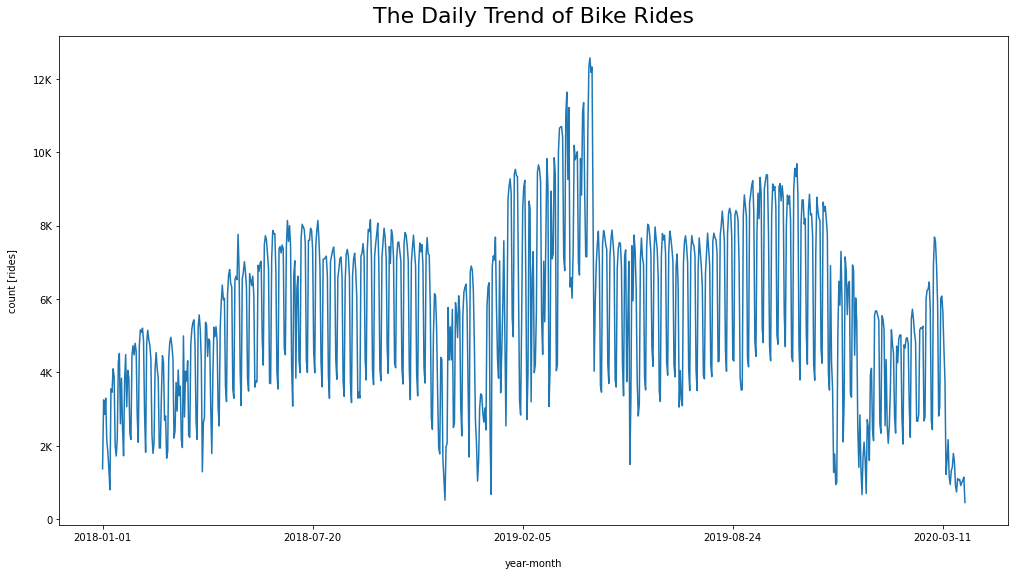

In [111]:
# TrendOfTheBikeRidesDaily
baywheels.groupby('start_time_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(17,9))
plt.title('The Daily Trend of Bike Rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('TrendOfTheBikeRidesDaily.png');

#### Count of daily bike rides from January 2018 to April 2020

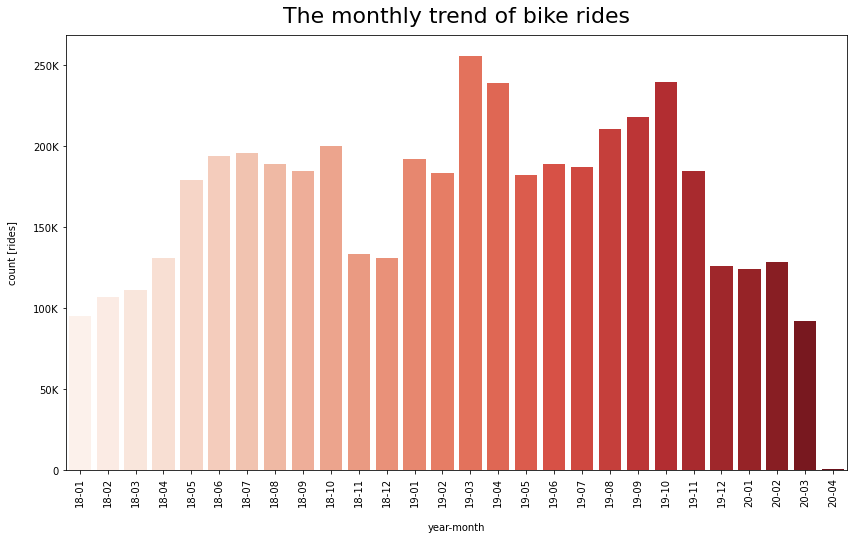

In [112]:
# TrendOfTheBikeRidesMonthly
plt.figure(figsize=(14,8))
a = sns.countplot(x='start_time_year_month_renamed', palette="Reds", data=baywheels.sort_values(by='start_time_year_month_renamed'))
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.title('The monthly trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('TrendOfTheBikeRidesMonthly.png')

### Question 2: How does rides trend change per customer?

#### Total rides

In [113]:
print('There are {} valid trips with full information'.format(baywheels['bike_id'].count()))

There are 4604284 valid trips with full information


#### Bike rides per weekday

In [114]:
trip_by_weekday_df = baywheels.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

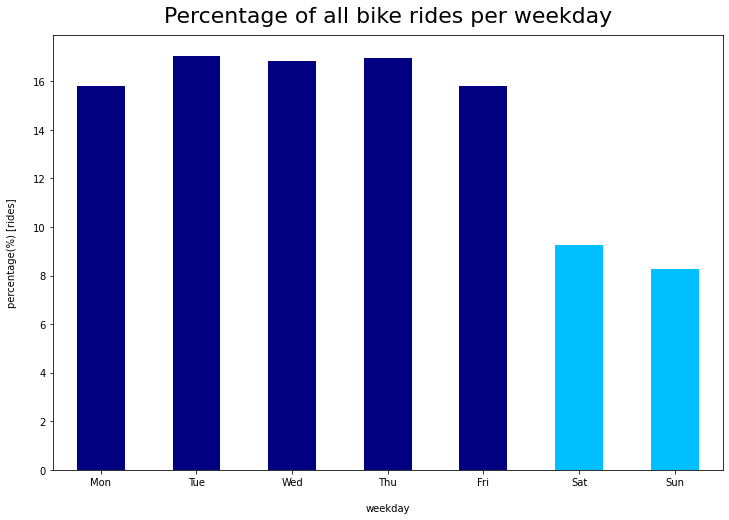

In [115]:
new_color = ['navy', 'navy', 'navy', 'navy', 'navy', 'deepskyblue', 'deepskyblue']
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=new_color, figsize=(12,8), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.savefig('BikeRidesPerWeekday.png');

#### Peak hours of the day

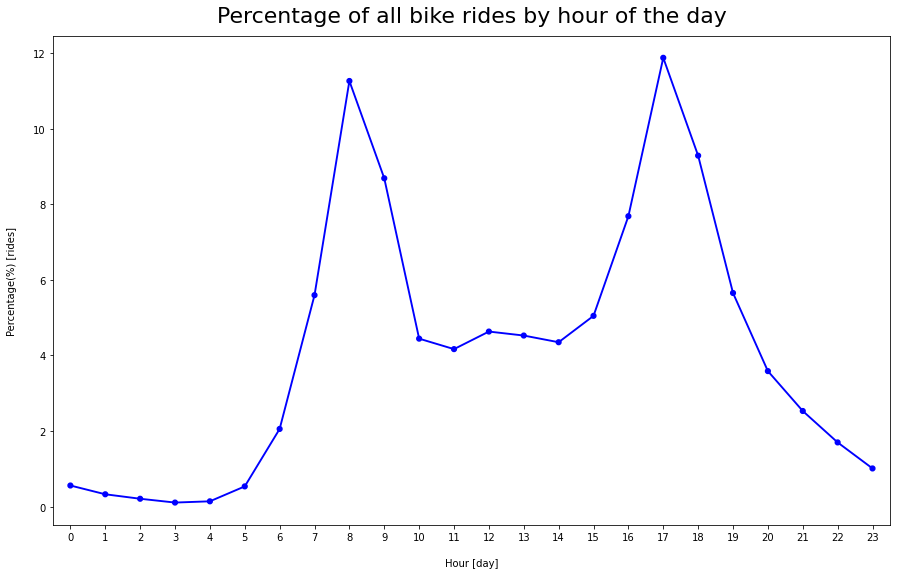

In [116]:
trip_by_hour_baywheels = baywheels.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()
trip_by_hour_baywheels['bike_id'] = (trip_by_hour_baywheels['bike_id']/trip_by_hour_baywheels['bike_id'].sum())*100
plt.figure(figsize=(15,9))
sns.pointplot(x='start_time_hour', y='bike_id', scale=.7, color='blue', data=trip_by_hour_baywheels)
plt.title('Percentage of all bike rides by hour of the day', fontsize=22, y=1.015)
plt.xlabel('Hour [day]', labelpad=16)
plt.ylabel('Percentage(%) [rides]', labelpad=16)
plt.savefig('PeakHoursOfTheDay.png');

As seen in the above graph, 8am and 5pm are the peak hours for this service which are, rush hours. Also, people use this service in their lunch time as well.

### Duration Distribution

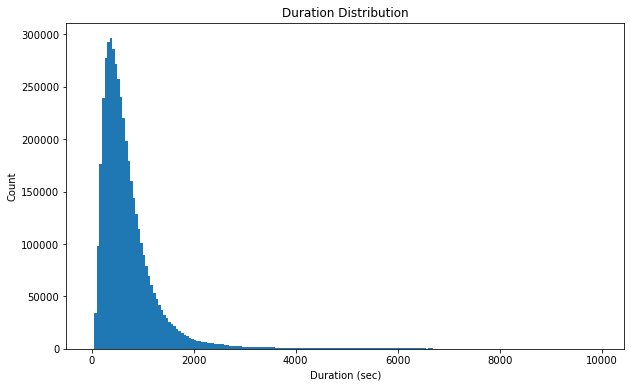

In [117]:
plt.figure(figsize=(10,6))
#bins = np.arange(0, df_top8_le100['duration_sec'].max()+50, 100)
bins = np.arange(0, 10000, 50)
plt.hist(data=baywheels, x='duration_sec', bins=bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Duration Distribution');

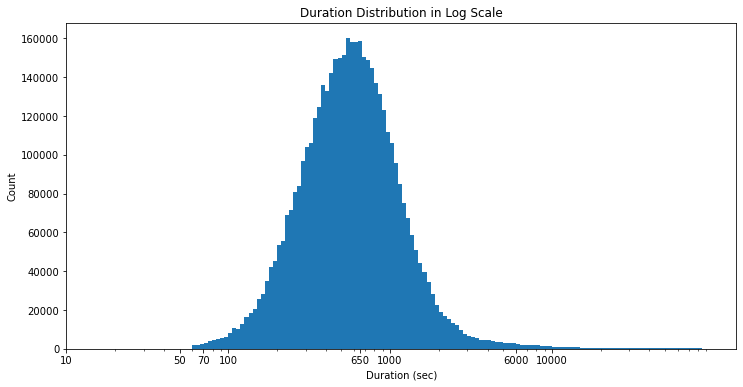

In [118]:
# let's put it on a log scale instead of linear scale to grasp the real distribution
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(baywheels['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 6])
plt.hist(data = baywheels, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10,50,70,100,650,1000,6000,10000], [10,50,70,100,650,1000,6000,10000])
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Duration Distribution in Log Scale');

## 3.2. Bivariate Exploration <a class="anchor" id="Bivariate-Exploration"></a>

### Question 3: Are there any difference between subscribers' and customers' behaviors?

#### Percentage of bike rides of subscribers vs customers

In [119]:
count_of_rides_per_user_type = baywheels.groupby('user_type').size().reset_index(name='count')
count_of_rides_per_user_type['count']/len(baywheels)*100

0    22.326208
1    77.673792
Name: count, dtype: float64

<blockquote>
- Percentage of subscribers is almost %88.15.<br>
- Percentage of customers is almost %11.85.
</blockquote>

#### User trends of bike rides

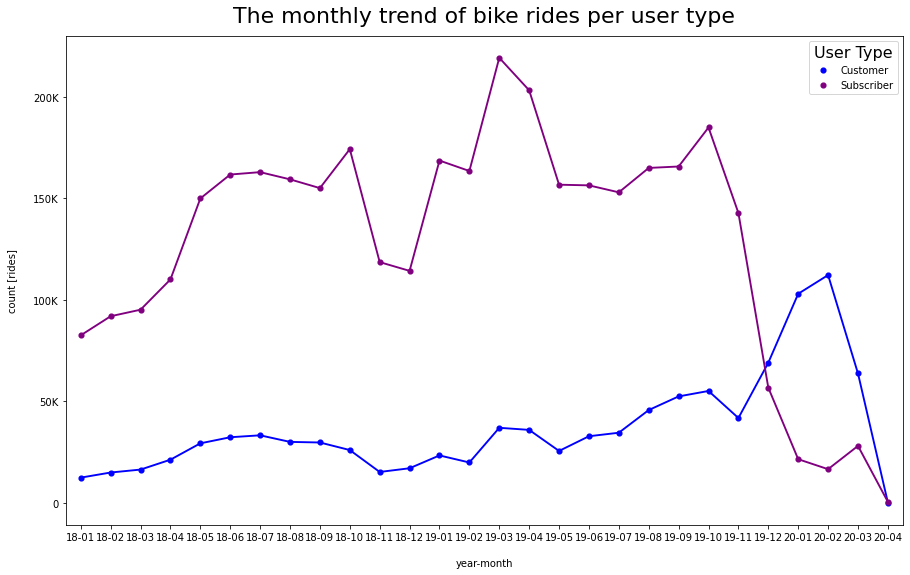

In [120]:
user_type_count_per_year_baywheels = baywheels.groupby(["start_time_year_month_renamed", "user_type"]).size().reset_index()

plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'purple', 'Customer':'blue'}
ax = sns.pointplot(x='start_time_year_month_renamed', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_count_per_year_baywheels)
plt.title('The monthly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('MonthlyTrendofBikeRidesUserTypes.png');

#### Average trip duration of subscribers vs customers

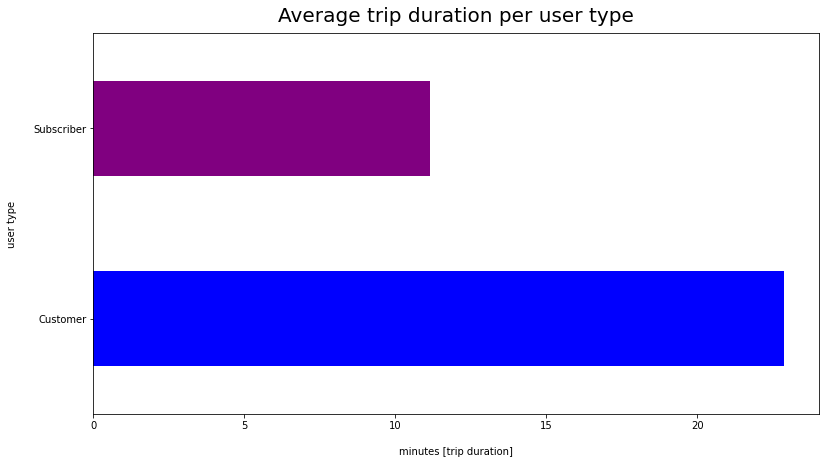

In [121]:
new_color=['blue', 'purple']
ax = baywheels.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16);

<blockquote>
Subscribers' average trip duration is around 12 minutes.<br>
Customers' average trip duration is more than 20 minutes.
</blockquote>

#### Average trip distance of subscribers vs customers¶

Text(0.5, 0, 'miles [distance]')

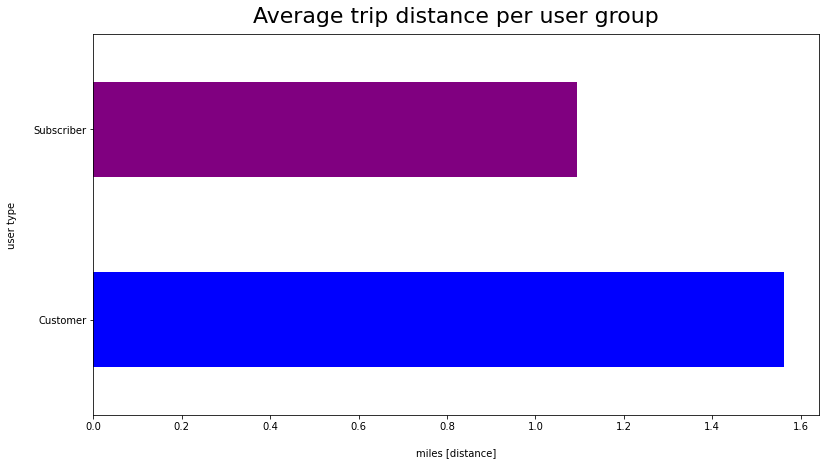

In [122]:
ax = baywheels.groupby('user_type')['distance_miles_estimates'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip distance per user group', fontsize=22, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('miles [distance]', labelpad=16)

<blockquote> Customers trip distances are roughly 1.5 times longer then subscriber trips, which is nearly 1 mile. </blockquote>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

<blockquote>Adding the client form to the study shows various patterns of usage by customers and subscribers. As described above, casual riders are more likely visitors who rent bikes mostly in summertime (the highest in September 2019), more frequently on weekends than on weekdays, and rent bikes more often during the day than around the clock (8-9am and 5-6pm). Subscribers are day-to-day riders who still use the device during the summer season. They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).<blockquote>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

<blockquote>There is a variation in the length of the trip between customers and subscribers. Customer journeys are typically longer than for subscribers, most likely due to the fact that they enjoy cycle rides on weekends during the summer, which promotes longer journeys across the city. Subscribers, on the other hand, use the scheme primarily for public transit purposes so that they choose fast trips to and from work / school.</blockquote>

## 3.3. Multivariate Exploration <a class="anchor" id="Multivariate-Exploration"></a>

In [123]:
baywheels_popStartlocs = baywheels['start_station_name'].value_counts(ascending=False)[:10]

In [124]:
baywheels_popStartlocs.head(10)

Market St at 10th St                                         85571
San Francisco Caltrain (Townsend St at 4th St)               81314
Berry St at 4th St                                           81038
San Francisco Ferry Building (Harry Bridges Plaza)           80888
San Francisco Caltrain Station 2  (Townsend St at 4th St)    73887
Montgomery St BART Station (Market St at 2nd St)             71624
Powell St BART Station (Market St at 4th St)                 69487
The Embarcadero at Sansome St                                64177
Howard St at Beale St                                        61609
Steuart St at Market St                                      60610
Name: start_station_name, dtype: int64

In [125]:
baywheels_popEndlocs = baywheels['end_station_name'].value_counts(ascending=False)[:10]

In [126]:
baywheels_popEndlocs.head(10)

San Francisco Caltrain (Townsend St at 4th St)               104466
San Francisco Caltrain Station 2  (Townsend St at 4th St)    101793
San Francisco Ferry Building (Harry Bridges Plaza)            97492
Montgomery St BART Station (Market St at 2nd St)              90435
Market St at 10th St                                          84248
Berry St at 4th St                                            79867
Powell St BART Station (Market St at 4th St)                  74993
The Embarcadero at Sansome St                                 74964
Steuart St at Market St                                       61710
Powell St BART Station (Market St at 5th St)                  61254
Name: end_station_name, dtype: int64

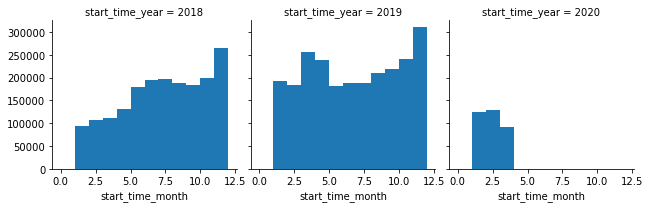

In [127]:
#Distribution of rides by months and year
g = sns.FacetGrid (data = baywheels, col='start_time_year', col_wrap=3)
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12]
g.map(plt.hist, "start_time_month" , bins=bins);

When you compare the years of 2018, 2019 and 2020 you do see that the most popular months are during the summer and the least popular months are at the beginning of the year.

In [129]:
baywheels_copy = baywheels.copy()

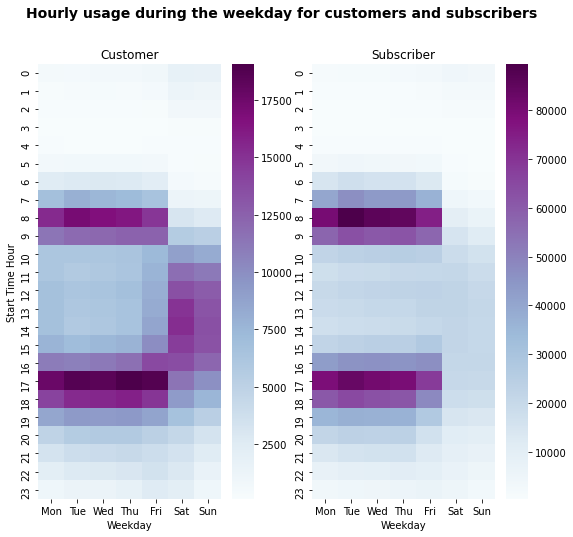

In [130]:
# Setting the weekday order
baywheels_copy['start_time_weekday_abbr'] = pd.Categorical(baywheels_copy['start_time_weekday_abbr'], 
                                                 categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                 ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
baywheels_customer = baywheels_copy.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday_abbr"])["bike_id"].size().reset_index()
baywheels_customer = baywheels_customer.pivot("start_time_hour", "start_time_weekday_abbr", "bike_id")
sns.heatmap(baywheels_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
baywheels_subscriber = baywheels_copy.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday_abbr"])["bike_id"].size().reset_index()
baywheels_subscriber = baywheels_subscriber.pivot("start_time_hour", "start_time_weekday_abbr", "bike_id")
sns.heatmap(baywheels_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

The story beautifully illustrates in one position the various patterns for consumers and subscribers that I've written up before.

_Customers use the bike sharing system more often on weekends:_
 - weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm
 - weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm

_Subscribers use the bike sharing system mainly on weekdays:_
 - weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
 - weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

<blockquote>Plotting a heat map on when bikes are high in demand during the day on each weekday sheds new eyes on the customer's behaviour. Plotting # bike trips during the day and # bike trips in the weekdays separately gave the impression that the market for bikes is very strong all day with a peak about 5 pm, which is not exactly accurate.  The pattern in weekdays for consumers (though consumers are not early birds) is mirrored by that of subscribers who rent bikes more around the clock (8-9am and 5-6pm). For clients, as seen in univariate explorations, most of the trips take place on weekends but often between 10am-8pm with a high on Saturdays about 2 pm, which was previously not noticeable.</blockquote>

# 4.CONCLUSION <a class="anchor" id="CONCLUSION"></a>

## 4.1. Who are Bay Wheels' Customers?

We have seen that customers take longer rides from subscribers. Because most customers are tourists and will travel longer distances to the see the city. 

What was abnormal was the distribution for the year of 2020, where it seemed that customers were more active than subscribers. Which might be due to the Covid-19 in the past couple months.

**Subscriber / Customer:**
- Percentage of subscriber users is almost %88.15. <br>
- Percentage of customers user is almost %11.85.

**Average Trip Time:**
- For customer: 20 minutes
- For subscriber: 12 minutes

**Average distance per user group**
- For customer: 1.6 miles
- For subscriber: 1.1 miles

### 4.2. What are The Usage Statistics

**Most Used Hours**
- In weekdays:  8 AM and 5 PM
- In weekends:  12-2 PM 

**Most Used Days (Weekly Analysis)**
- For Customers: Thursday and Friday Evenings
- For Subscribers: Tuesday Mornings    

### 4.3. What are the Most Popular Locations?

**Where People usually Start Their trip**
- Market St at 10th St                                        
- San Francisco Caltrain (Townsend St at 4th St)              
- Berry St at 4th St                                        
- San Francisco Ferry Building (Harry Bridges Plaza)  
- San Francisco Caltrain Station 2  (Townsend St at 4th St)

**Where People usually End Their trip**
- San Francisco Caltrain (Townsend St at 4th St)               
- San Francisco Caltrain Station 2  (Townsend St at 4th St)    
- San Francisco Ferry Building (Harry Bridges Plaza)           
- Montgomery St BART Station (Market St at 2nd St)             
- Market St at 10th St                                        